In [48]:
import cv2
from matplotlib import pyplot as plt
import scipy.io
import os
import random
import string
import numpy as np
import shutil

In [2]:
# Helper function to show OpenCV images with matplotlib in notebook

def show(im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

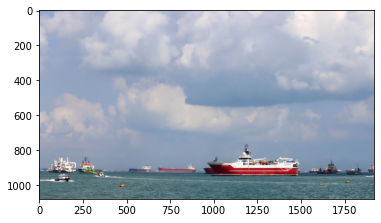

In [3]:
# Show first frame of selected video

vid_path = r"C:\Users\Noah\PycharmProjects\BoatID\data\SMD\VIS_Onshore\Videos\MVI_1474_VIS.avi"

cap = cv2.VideoCapture(vid_path)
success,image = cap.read()
show(image)

In [4]:
# Load label information
mat = scipy.io.loadmat(r'C:\Users\Noah\PycharmProjects\BoatID\data\SMD_Split\VIS_Test\ObjectGT\MVI_1474_VIS_ObjectGT.mat')
frame=0
# Show bounding boxes (Top Left corner (x,y) + (w,h))
mat['structXML'][0][frame][-1]

array([[  44.90706476,  828.74222035,  179.2430614 ,  109.80656013],
       [ 228.99453322,  831.97182506,  153.40622372,  113.03616484],
       [ 324.26787216,  917.55634987,   77.51051304,   46.82926829],
       [ 488.97771236,  880.41589571,  174.39865433,   58.13288478],
       [ 676.29478553,  873.95668629,  240.60555088,   71.05130362],
       [ 947.58158116,  757.69091674,  566.79562658,  209.92430614],
       [1541.82884777,  878.80109336,   88.81412952,   67.82169891],
       [1585.42851135,  856.19386039,  148.56181665,   96.8881413 ],
       [1748.5235492 ,  877.186291  ,  119.49537426,   79.12531539],
       [1876.09293524,  875.57148865,   61.36248949,   67.82169891],
       [  82.04751892,  925.63036165,  109.80656013,   66.20689655],
       [ 450.22245585,  985.37804878,   54.90328007,   33.91084945],
       [1742.06433978,  967.61522288,   48.44407065,   27.45164003],
       [1603.19133726,  990.22245585,   46.82926829,   22.60723297],
       [1339.97855341,  738.313288

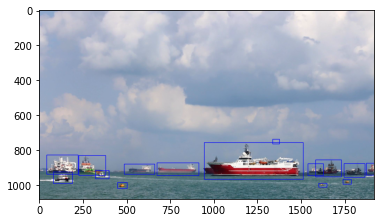

In [5]:
# Draw bounding boxes
for coords in mat['structXML'][0][frame][-1]:
    image = cv2.rectangle(image, (int(coords[0]), int(coords[1])), (int(coords[0]+coords[2]), int(coords[1]+coords[3])), (255,0,0), 2)
show(image)

In [6]:
# Get class label and bounding box
for i, coords in enumerate(mat['structXML'][0][frame][-1]):
    print(mat['structXML'][0][frame][1][i][0]-1, coords[0], coords[1], coords[2], coords[3])

2 44.907064760302774 828.7422203532378 179.24306139613122 109.80656013456701
2 228.9945332211943 831.9718250630781 153.40622371740957 113.03616484440704
0 324.2678721614802 917.5563498738434 77.51051303616487 46.82926829268308
2 488.9777123633306 880.4158957106811 174.39865433137084 58.13288477712376
2 676.2947855340623 873.9566862910008 240.60555088309513 71.05130361648435
2 947.5815811606393 757.6909167367534 566.7956265769557 209.92430613961312
2 1541.8288477712367 878.8010933557609 88.81412952060555 67.82169890664431
2 1585.4285113540793 856.1938603868796 148.56181665264944 96.88814129520597
2 1748.5235492010095 877.1862910008408 119.49537426408756 79.125315391085
9 1876.0929352396977 875.5714886459207 61.36248948696402 67.82169890664431
0 82.0475189234651 925.630361648444 109.80656013456687 66.20689655172418
1 450.2224558452482 985.3780487804877 54.90328006728333 33.910849453322044
1 1742.0643397813292 967.6152228763665 48.444070647602985 27.451640033641752
1 1603.1913372582005 99

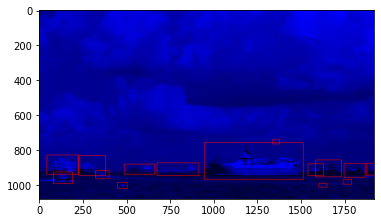

In [7]:
# RGB channel isolation
temp_im = np.zeros((image.shape),dtype=int)
temp_im[:,:,2] = image[:,:,2]
for coords in mat['structXML'][0][frame][-1]:
    temp_im = cv2.rectangle(temp_im, (int(coords[0]), int(coords[1])), (int(coords[0]+coords[2]), int(coords[1]+coords[3])), (255,0,0), 2)
plt.imshow(temp_im)

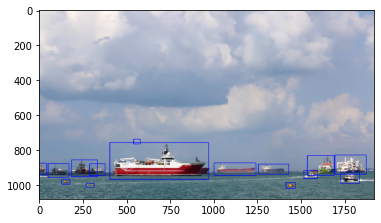

In [8]:
# Horizontal Flip
hflip = cv2.flip(image,1)
for coords in mat['structXML'][0][frame][-1]:
    w = int(coords[2])
    h = int(coords[3])
    x = hflip.shape[1] - w - coords[0]
    y = int(coords[1])
    hflip = cv2.rectangle(hflip, (int(x), int(y)), (int(x+w), int(y+h)), (255,0,0), 2)
show(hflip)

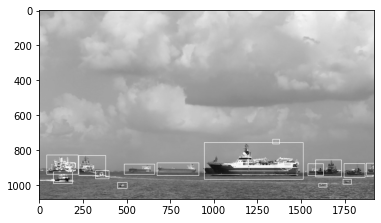

In [9]:
# Grayscale
gscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
for coords in mat['structXML'][0][frame][-1]:
    gscale = cv2.rectangle(gscale, (int(coords[0]), int(coords[1])), (int(coords[0]+coords[2]), int(coords[1]+coords[3])), (255,0,0), 2)
show(gscale)

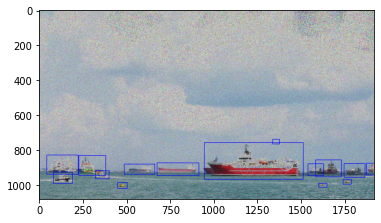

In [10]:
# Gaussian Noise
img1 = image.copy() 
cv2.randn(img1,(0,0,0),(50,50,50))
test = image+img1
for coords in mat['structXML'][0][frame][-1]:
    test = cv2.rectangle(test, (int(coords[0]), int(coords[1])), (int(coords[0]+coords[2]), int(coords[1]+coords[3])), (255,0,0), 2)
show(test)

In [11]:
# Path to all videos

val_path = r"C:\Users\Noah\PycharmProjects\BoatID\data\SMD_Split\VIS_Val"
val_videos = os.listdir(val_path+"\Videos")
val_objectGTs = os.listdir(val_path+"\ObjectGT")

train_path = r"C:\Users\Noah\PycharmProjects\BoatID\data\SMD_Split\VIS_Train"
train_videos = os.listdir(train_path+"\Videos")
train_objectGTs = os.listdir(train_path+"\ObjectGT")

test_path = r"C:\Users\Noah\PycharmProjects\BoatID\data\SMD_Split\VIS_Test"
test_videos = os.listdir(test_path+"\Videos")
test_objectGTs = os.listdir(test_path+"\ObjectGT")

In [12]:
# Remove videos without annotations

val_video_list = []
for v in val_videos:
    if v.split(".")[0]+"_ObjectGT.mat" in val_objectGTs:
        val_video_list.append(val_path+"\Videos\\"+v)
        print("Added to val:",v)
    else:
        print("Removed:",v)
        
train_video_list = []
for v in train_videos:
    if v.split(".")[0]+"_ObjectGT.mat" in train_objectGTs:
        train_video_list.append(train_path+"\Videos\\"+v)
        print("Added to train:",v)
    else:
        print("Removed:",v)
        
test_video_list = []
for v in test_videos:
    if v.split(".")[0]+"_ObjectGT.mat" in test_objectGTs:
        test_video_list.append(test_path+"\Videos\\"+v)
        print("Added to test:",v)
    else:
        print("Removed:",v)

Added to val: MVI_0790_VIS_OB.avi
Added to val: MVI_1469_VIS.avi
Added to val: MVI_1578_VIS.avi
Added to train: MVI_0801_VIS_OB.avi
Added to train: MVI_1451_VIS_Haze.avi
Added to train: MVI_1452_VIS_Haze.avi
Added to train: MVI_1478_VIS.avi
Added to train: MVI_1479_VIS.avi
Added to train: MVI_1481_VIS.avi
Added to train: MVI_1482_VIS.avi
Added to train: MVI_1583_VIS.avi
Added to train: MVI_1584_VIS.avi
Added to train: MVI_1587_VIS.avi
Added to train: MVI_1592_VIS.avi
Added to train: MVI_1609_VIS.avi
Added to train: MVI_1610_VIS.avi
Added to train: MVI_1613_VIS.avi
Added to train: MVI_1614_VIS.avi
Added to train: MVI_1615_VIS.avi
Added to train: MVI_1617_VIS.avi
Added to train: MVI_1619_VIS.avi
Added to train: MVI_1620_VIS.avi
Added to train: MVI_1622_VIS.avi
Added to train: MVI_1623_VIS.avi
Added to train: MVI_1624_VIS.avi
Added to train: MVI_1625_VIS.avi
Added to train: MVI_1644_VIS.avi
Added to train: MVI_1645_VIS.avi
Added to train: MVI_1646_VIS.avi
Added to test: MVI_0797_VIS_OB.av

In [13]:
print(len(train_video_list),len(test_video_list),len(val_video_list))

26 10 3


In [14]:
def cvtBox2Txt(to_path, bboxs, flip=False):
    coordsList = []
    for coords in bboxs:
        w1 = coords[2]
        x1 = coords[0]
        if flip:
            x1 = 1920 - w - x1
        y1 = coords[1]
        h1 = coords[3]
        
        xcen = x1 + w1/2
        ycen = y1 + h1/2

        x2 = xcen/1920
        y2 = ycen/1080
        w2 = w1/1920
        h2 = h1/1080
        
        coordsList.append(" ".join(map(str,[0, x2, y2, w2, h2]))+"\n")
        
    my_file = open(to_path, "w")
    my_file.writelines(coordsList)
    my_file.close()

In [15]:
def saveOriginal(image,bboxs,to_path):
    cv2.imwrite(to_path+".jpeg",cv2.resize(image,(960,540)))
    cvtBox2Txt(to_path+".txt",bboxs)

In [16]:
def saveBlue(image,bboxs,to_path):
    temp_im = np.zeros((image.shape),dtype=int)
    temp_im[:,:,0] = image[:,:,0]
    cv2.imwrite(to_path+".jpeg",cv2.resize(temp_im.astype('float32'),(960,540)))
    cvtBox2Txt(to_path+".txt",bboxs)

In [17]:
def saveGreen(image,bboxs,to_path):
    temp_im = np.zeros((image.shape),dtype=int)
    temp_im[:,:,1] = image[:,:,1]
    cv2.imwrite(to_path+".jpeg",cv2.resize(temp_im.astype('float32'),(960,540)))
    cvtBox2Txt(to_path+".txt",bboxs)

In [18]:
def saveRed(image,bboxs,to_path):
    temp_im = np.zeros((image.shape),dtype=int)
    temp_im[:,:,2] = image[:,:,2]
    cv2.imwrite(to_path+".jpeg",cv2.resize(temp_im.astype('float32'),(960,540)))
    cvtBox2Txt(to_path+".txt",bboxs)

In [19]:
def saveMirror(image,bboxs,to_path):
    hflip = cv2.flip(image,1)
    cv2.imwrite(to_path+".jpeg",cv2.resize(hflip,(960,540)))
    cvtBox2Txt(to_path+".txt",bboxs, flip=True)

In [20]:
def saveGray(image,bboxs,to_path):
    gscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cv2.imwrite(to_path+".jpeg",cv2.resize(gscale,(960,540)))
    cvtBox2Txt(to_path+".txt",bboxs)

In [21]:
def saveNoise(image,bboxs,to_path):
    img1 = image.copy() 
    cv2.randn(img1,(0,0,0),(30,30,30))
    test = image+img1
    cv2.imwrite(to_path+".jpeg",cv2.resize(test,(960,540)))
    cvtBox2Txt(to_path+".txt",bboxs)

In [47]:
def processVideos(video_list,folder_path):
    TO_PATH = folder_path + "\Frames\\" # CHANGE THIS LATER
    for vid in video_list:
        cap = cv2.VideoCapture(vid)
        vid_name = vid.split("\\")[-1]
        gt_name = vid_name.split(".")[0]+"_ObjectGT.mat"
        mat = scipy.io.loadmat(folder_path+"\ObjectGT"+"\\"+gt_name)
        success = True
        frameCount = 0

        while success:
            success,image = cap.read()
            if not success:
                print("Done:", vid_name)
                break
            xdim = image.shape[1]
            ydim = image.shape[0]
            bboxs = []
            if not frameCount % 2:
                ran = ''.join(random.choices(string.ascii_uppercase + string.digits, k = 10))
                for i, coords in enumerate(mat['structXML'][0][frameCount][-1]):
                    classNum = mat['structXML'][0][frameCount][1][i][0]
                    x1 = coords[0]
                    y1 = coords[1]
                    w1 = coords[2]
                    h1 = coords[3]
                    if (classNum > 0) & (classNum != 8) & (classNum != 9) & (classNum != 10):
                        bboxs.append([x1,y1,w1,h1])
                    
                if len(bboxs) != 0:
                    saveOriginal(image,bboxs,TO_PATH+ran+"_OG")
                    saveRed(image,bboxs,TO_PATH+ran+"_R")
                    saveBlue(image,bboxs,TO_PATH+ran+"_B")
                    saveGreen(image,bboxs,TO_PATH+ran+"_G")
                    saveMirror(image,bboxs,TO_PATH+ran+"_M")
                    saveGray(image,bboxs,TO_PATH+ran+"_W")
                    saveNoise(image,bboxs,TO_PATH+ran+"_N")
            frameCount+=1
        cap.release()

In [22]:
len(train_video_listist)

26

In [117]:
processVideos(val_video_list,val_path)

In [119]:
processVideos(test_video_list,test_path)

Done: MVI_0797_VIS_OB.avi
Done: MVI_1448_VIS_Haze.avi
Done: MVI_1474_VIS.avi
Done: MVI_1484_VIS.avi
Done: MVI_1486_VIS.avi
Done: MVI_1582_VIS.avi
Done: MVI_1612_VIS.avi
Done: MVI_1626_VIS.avi
Done: MVI_1627_VIS.avi
Done: MVI_1640_VIS.avi


In [120]:
processVideos(train_video_list,train_path)

Done: MVI_0801_VIS_OB.avi
Done: MVI_1451_VIS_Haze.avi
Done: MVI_1452_VIS_Haze.avi
Done: MVI_1478_VIS.avi
Done: MVI_1479_VIS.avi
Done: MVI_1481_VIS.avi
Done: MVI_1482_VIS.avi
Done: MVI_1583_VIS.avi
Done: MVI_1584_VIS.avi
Done: MVI_1587_VIS.avi
Done: MVI_1592_VIS.avi
Done: MVI_1609_VIS.avi
Done: MVI_1610_VIS.avi
Done: MVI_1613_VIS.avi
Done: MVI_1614_VIS.avi
Done: MVI_1615_VIS.avi
Done: MVI_1617_VIS.avi
Done: MVI_1619_VIS.avi
Done: MVI_1620_VIS.avi
Done: MVI_1622_VIS.avi
Done: MVI_1623_VIS.avi
Done: MVI_1624_VIS.avi
Done: MVI_1625_VIS.avi
Done: MVI_1644_VIS.avi
Done: MVI_1645_VIS.avi
Done: MVI_1646_VIS.avi


In [51]:
def moveVideos(file_list,num):
    for f in file_list:
        shutil.move(r"C:\Users\Noah\PycharmProjects\BoatID\data\SMD_Split\VIS_Train\obj\\"+f,
                    r"C:\Users\Noah\PycharmProjects\BoatID\data\SMD_Split\VIS_Train\obj"+str(num)+"\\"+f)

In [ ]:
train_list = os.listdir(r"C:\Users\Noah\PycharmProjects\BoatID\data\SMD_Split\VIS_Train\obj")
ind = int(len(train_list)/7)

for i in range(7):
    moveVideos(train_list[i*ind:(i+1)*ind],i)